In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets


In [2]:

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension (for CNN)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.fit(train_images, train_labels, epochs=16, batch_size=64, validation_split=0.2)


Epoch 1/16
750/750 [==============================] - 42s 57ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0593 - val_accuracy: 0.9905
Epoch 2/16
750/750 [==============================] - 43s 58ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0683 - val_accuracy: 0.9901
Epoch 3/16
750/750 [==============================] - 45s 60ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0491 - val_accuracy: 0.9908
Epoch 4/16
750/750 [==============================] - 46s 61ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0615 - val_accuracy: 0.9888
Epoch 5/16
750/750 [==============================] - 46s 61ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0474 - val_accuracy: 0.9920
Epoch 6/16
750/750 [==============================] - 43s 57ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0581 - val_accuracy: 0.9909
Epoch 7/16
750/750 [==============================] - 46s 61ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0755 - val_accuracy:

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 3s 9ms/step - loss: 0.0463 - accuracy: 0.9924
Test accuracy: 0.9923999905586243


Epoch 1/16
750/750 [==============================] - 45s 60ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0815 - val_accuracy: 0.9886
Epoch 2/16
750/750 [==============================] - 42s 55ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0695 - val_accuracy: 0.9912
Epoch 3/16
750/750 [==============================] - 41s 55ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0706 - val_accuracy: 0.9908
Epoch 4/16
750/750 [==============================] - 42s 56ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0830 - val_accuracy: 0.9900
Epoch 5/16
750/750 [==============================] - 42s 55ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0587 - val_accuracy: 0.9922
Epoch 6/16
750/750 [==============================] - 46s 61ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0628 - val_accuracy: 0.9910
Epoch 7/16
750/750 [==============================] - 45s 60ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0714 - val_accuracy:

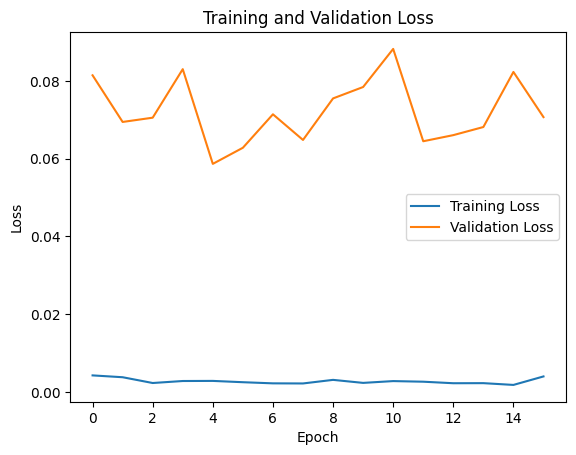

In [13]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(train_images, train_labels, epochs=16, batch_size=64, validation_split=0.2)

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
